In [1]:
from sklearn import datasets
data = datasets.fetch_olivetti_faces(data_home=None, shuffle=True, random_state=0)

In [2]:
print(data.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


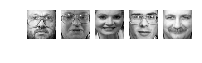

In [3]:
import matplotlib.pyplot as plt
for i in range(5):
    face = data.images[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
import numpy as np
X = data.data
Y = data.target.reshape([data.target.shape[0],1])
print(X.shape)
trainX = X[:360,]
print(trainX.shape)
testX  = X[360:,]
trainY = Y[:360,]
testY  = Y[360:,]
batchSize = 1
batches = int (360/batchSize)
batchX = np.array_split(trainX,(360/batchSize),axis = 0)
batchY = np.array_split(trainY,(360/batchSize),axis = 0)

(400, 4096)
(360, 4096)


In [11]:
import tensorflow as tf

# reset everything to rerun in jupyter
tf.reset_default_graph()

# config
learning_rate = 0.0001
training_epochs = 1
logs_path = "/tmp/olivette/5"

# input images
with tf.name_scope('input'):
    # Predictors
    x = tf.placeholder(tf.float32, shape=[None, 4096], name="x-input") 
    # target 10 output classes
    y_ = tf.placeholder(tf.float32, shape=[None, 1], name="y-input")

# Weights
with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal([4096, 1]))

# bias
with tf.name_scope("biases"):
    b = tf.Variable(tf.ones([1]))

# model
with tf.name_scope("softmax"):
    # y is our prediction
    h = tf.matmul(x, W) + b
    y = tf.nn.softmax(h)

# cost function
with tf.name_scope('cross_entropy'):
    cross_entropy = -tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=h))

# specify optimizer
with tf.name_scope('train'):
    # GradientDescent
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

with tf.name_scope('Accuracy'):
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
# create a summary for cost and accuracy
tf.summary.scalar("cost", cross_entropy)
tf.summary.scalar("accuracy", accuracy)

# merge all summaries 
summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    # initilaizing variables
    sess.run(tf.global_variables_initializer())

    # log writer object
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        
    # training
    for epoch in range(training_epochs):
        
        for i in range(batches):
            batch_x, batch_y = batchX[i],batchY[i]
            
            # perform the operations 
            _,c, summary = sess.run([train_op,cross_entropy, summary_op], feed_dict={x: batch_x, y_: batch_y})
            print("Iteration ", i, "  cost ", c)
            # write log
            writer.add_summary(summary, i)
            writer.flush()
        if epoch % 5 == 0: 
            print ("Epoch: ", epoch)
    print ("Accuracy: ", accuracy.eval(feed_dict={x: testX, y_: testY}))

Iteration  0   cost  -5.29099
Iteration  1   cost  -27.0018
Iteration  2   cost  -25.6962
Iteration  3   cost  -41.6725
Iteration  4   cost  -24.3075
Iteration  5   cost  -22.3974
Iteration  6   cost  -33.9334
Iteration  7   cost  -3.36483
Iteration  8   cost  -25.1598
Iteration  9   cost  -13.5098
Iteration  10   cost  -26.0308
Iteration  11   cost  -11.3235
Iteration  12   cost  -9.76189
Iteration  13   cost  -40.9407
Iteration  14   cost  -18.5049
Iteration  15   cost  -39.4878
Iteration  16   cost  -21.1535
Iteration  17   cost  -31.5282
Iteration  18   cost  -33.146
Iteration  19   cost  -15.2874
Iteration  20   cost  -22.9538
Iteration  21   cost  -1.32912
Iteration  22   cost  -21.1236
Iteration  23   cost  -37.3927
Iteration  24   cost  -25.376
Iteration  25   cost  -18.3424
Iteration  26   cost  -39.2424
Iteration  27   cost  -22.9605
Iteration  28   cost  -27.8133
Iteration  29   cost  -24.941
Iteration  30   cost  -16.5686
Iteration  31   cost  -30.6442
Iteration  32   cost 

In [12]:
!tensorboard --logdir="/tmp/olivette/5"

2018-06-01 13:57:12.028896: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
TensorBoard 1.8.0 at http://krithika:6006 (Press CTRL+C to quit)
^C
